<a href="https://colab.research.google.com/github/diegoednaldo/bootcamp-eng-dados-nttdata/blob/main/POO_sistema_bancario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

POO Sistema Bancário:

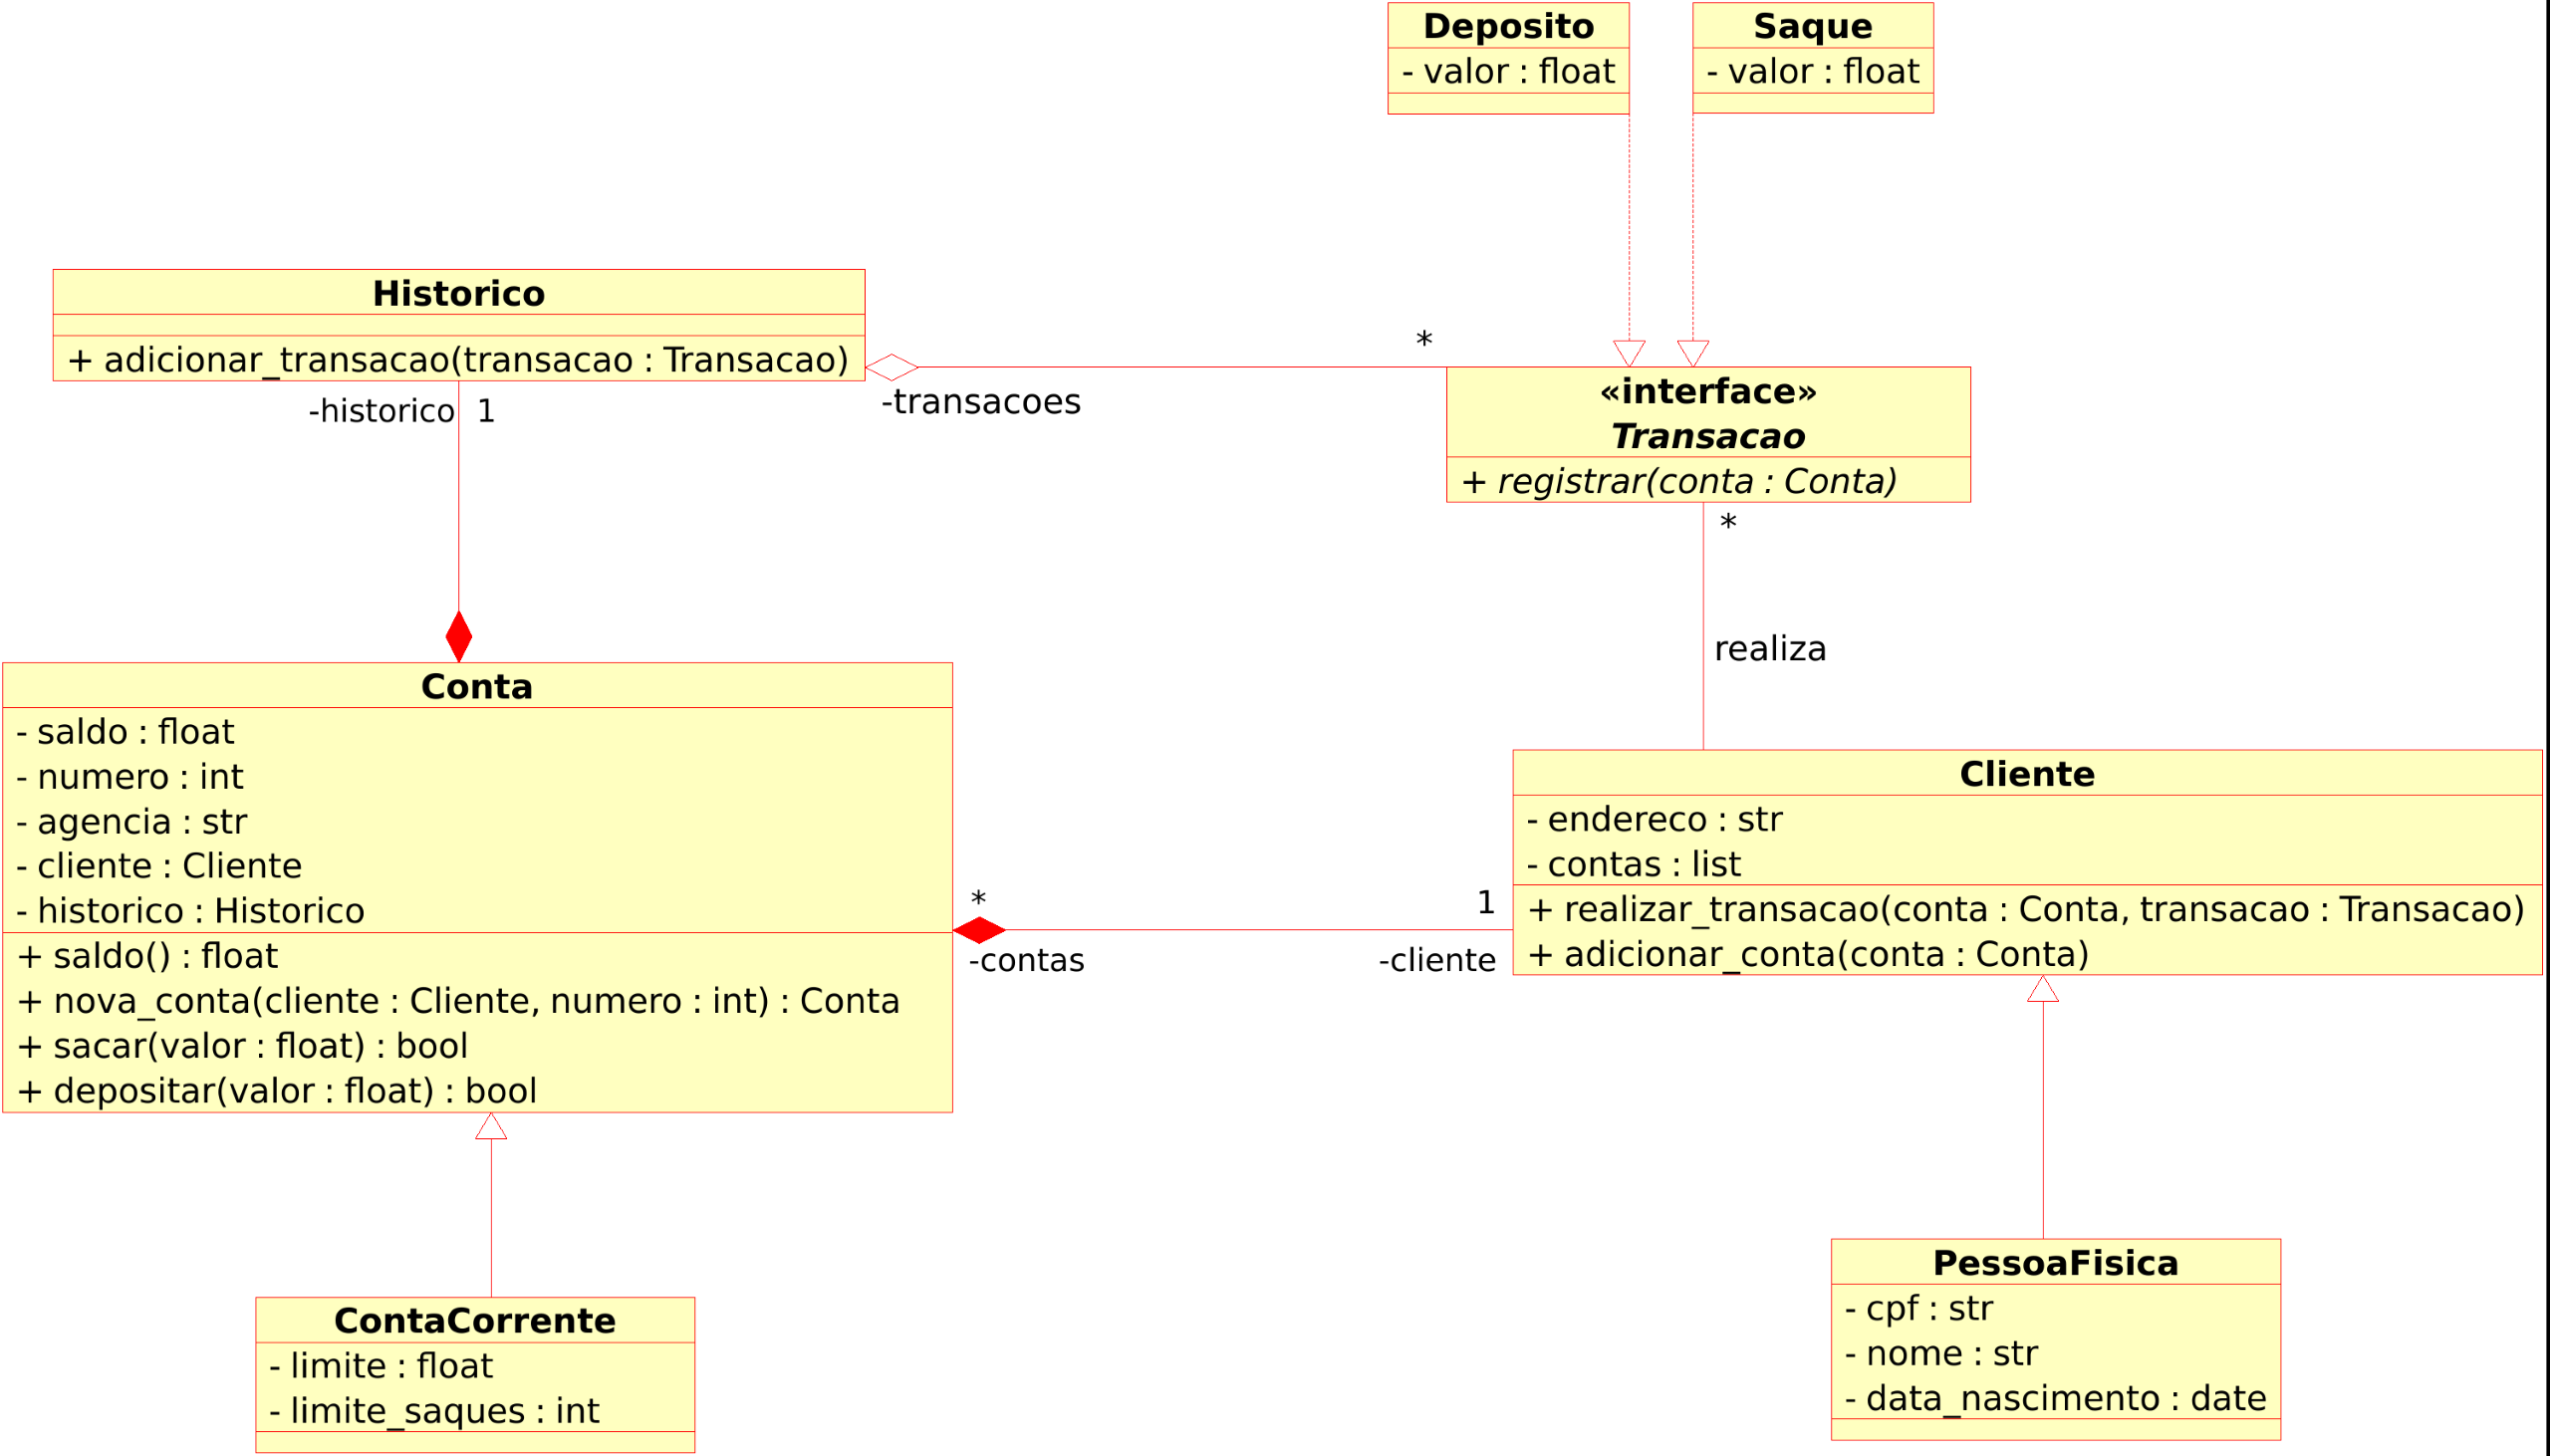

In [6]:
import textwrap

In [8]:
def menu():
    menu_text = """\n
    ================ MENU ================
    [d]\tDepositar
    [s]\tSacar
    [e]\tExtrato
    [nc]\tNova conta
    [lc]\tListar contas
    [nu]\tNovo usuário
    [q]\tSair
    => """
    return input(textwrap.dedent(menu_text)).strip()

def atualizar_saldo_e_extrato(saldo, valor, extrato, operacao):
    if valor > 0:
        saldo += valor if operacao == "Depósito" else -valor
        extrato += f"{operacao}:\t\tR$ {valor:.2f}\n"
        print(f"\n=== {operacao} realizado com sucesso! ===")
    else:
        print("\n@@@ Operação falhou! O valor informado é inválido. @@@")
    return saldo, extrato

def depositar(saldo, valor, extrato):
    return atualizar_saldo_e_extrato(saldo, valor, extrato, "Depósito")

def sacar(saldo, valor, extrato, limite, numero_saques, limite_saques):
    if valor > saldo:
        print("\n@@@ Operação falhou! Você não tem saldo suficiente. @@@")
    elif valor > limite:
        print("\n@@@ Operação falhou! O valor do saque excede o limite. @@@")
    elif numero_saques >= limite_saques:
        print("\n@@@ Operação falhou! Número máximo de saques excedido. @@@")
    else:
        saldo, extrato = atualizar_saldo_e_extrato(saldo, valor, extrato, "Saque")
        numero_saques += 1
    return saldo, extrato, numero_saques

def exibir_extrato(saldo, extrato):
    print("\n================ EXTRATO ================")
    print("Não foram realizadas movimentações." if not extrato else extrato)
    print(f"\nSaldo:\t\tR$ {saldo:.2f}")
    print("==========================================")

def criar_usuario(usuarios):
    cpf = input("Informe o CPF (somente número): ")
    if filtrar_usuario(cpf, usuarios):
        print("\n@@@ Já existe usuário com esse CPF! @@@")
        return

    nome = input("Informe o nome completo: ")
    data_nascimento = input("Informe a data de nascimento (dd-mm-aaaa): ")
    endereco = input("Informe o endereço (logradouro, nro - bairro - cidade/sigla estado): ")

    usuarios.append({"nome": nome, "data_nascimento": data_nascimento, "cpf": cpf, "endereco": endereco})
    print("=== Usuário criado com sucesso! ===")

def filtrar_usuario(cpf, usuarios):
    return next((u for u in usuarios if u["cpf"] == cpf), None)

def criar_conta(agencia, numero_conta, usuarios):
    cpf = input("Informe o CPF do usuário: ")
    usuario = filtrar_usuario(cpf, usuarios)
    if usuario:
        print("\n=== Conta criada com sucesso! ===")
        return {"agencia": agencia, "numero_conta": numero_conta, "usuario": usuario}
    print("\n@@@ Usuário não encontrado, fluxo de criação de conta encerrado! @@@")

def listar_contas(contas):
    for conta in contas:
        linha = f"""
            Agência:\t{conta['agencia']}
            C/C:\t\t{conta['numero_conta']}
            Titular:\t{conta['usuario']['nome']}
        """
        print("=" * 100)
        print(textwrap.dedent(linha))

def main():
    LIMITE_SAQUES = 3
    AGENCIA = "0001"

    saldo = 0
    limite = 500
    extrato = ""
    numero_saques = 0
    usuarios = []
    contas = []

    opcoes_validas = {"d", "s", "e", "nc", "lc", "nu", "q"}

    while True:
        opcao = menu()
        if opcao not in opcoes_validas:
            print("Operação inválida, por favor selecione novamente a operação desejada.")
            continue

        if opcao == "d":
            try:
                valor = float(input("Informe o valor do depósito: "))
                saldo, extrato = depositar(saldo, valor, extrato)
            except ValueError:
                print("Valor inválido, por favor informe um número.")

        elif opcao == "s":
            try:
                valor = float(input("Informe o valor do saque: "))
                saldo, extrato, numero_saques = sacar(
                    saldo, valor, extrato, limite, numero_saques, LIMITE_SAQUES
                )
            except ValueError:
                print("Valor inválido, por favor informe um número.")

        elif opcao == "e":
            exibir_extrato(saldo, extrato)

        elif opcao == "nu":
            criar_usuario(usuarios)

        elif opcao == "nc":
            numero_conta = len(contas) + 1
            conta = criar_conta(AGENCIA, numero_conta, usuarios)
            if conta:
                contas.append(conta)

        elif opcao == "lc":
            listar_contas(contas)

        elif opcao == "q":
            break

if __name__ == "__main__":
    main()



================ MENU ================
[d]	Depositar
[s]	Sacar
[e]	Extrato
[nc]	Nova conta
[lc]	Listar contas
[nu]	Novo usuário
[q]	Sair
=> nu
Informe o CPF (somente número): 12345678901
Informe o nome completo: Diego Santana
Informe a data de nascimento (dd-mm-aaaa): 12-12-1999
Informe o endereço (logradouro, nro - bairro - cidade/sigla estado): R Sa de Vasco, 0 - Viradouro - oscar
=== Usuário criado com sucesso! ===


================ MENU ================
[d]	Depositar
[s]	Sacar
[e]	Extrato
[nc]	Nova conta
[lc]	Listar contas
[nu]	Novo usuário
[q]	Sair
=> nc
Informe o CPF do usuário: 12345678901

=== Conta criada com sucesso! ===


================ MENU ================
[d]	Depositar
[s]	Sacar
[e]	Extrato
[nc]	Nova conta
[lc]	Listar contas
[nu]	Novo usuário
[q]	Sair
=> d
Informe o valor do depósito: 1000

=== Depósito realizado com sucesso! ===


================ MENU ================
[d]	Depositar
[s]	Sacar
[e]	Extrato
[nc]	Nova conta
[lc]	Listar contas
[nu]	Novo usuário
[q]	Sair
